<a href="https://colab.research.google.com/github/ahmed913/bmi_calculator/blob/master/Skin%20cancer%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin cancer Detiction using CNN

In [4]:
#import library
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import cv2 


In [5]:
train_path='/content/drive/MyDrive/deep learning/data/train'
test_path='/content/drive/MyDrive/deep learning/data/test'


In [6]:
os.listdir(train_path)


['benign', 'malignant']

In [7]:
#Image Augmentation using Keras ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
s=224
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range=10,
                                   zoom_range = 0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(directory=train_path,
                                                 target_size = (s, s),
                                                 batch_size = 6,
                                                 class_mode = 'binary')


test_set = test_datagen.flow_from_directory(directory=test_path, 
    target_size=(s,s),
    batch_size=6,
    class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [8]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1, 
                               horizontal_flip=True,  
                              )

In [9]:
training_set.class_indices

{'benign': 0, 'malignant': 1}

In [10]:
# built model
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
model = Sequential()
image_shape = (s,s,3)

model.add(Conv2D(32,(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



model.add(Conv2D(128,(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(256,(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [13]:

batch_size = 128

training_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen= image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)



Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [14]:
# results = model.fit(training_set,epochs=10, validation_data=test_set,callbacks=[early_stop])
results = model.fit(training_set,validation_data=test_set,epochs=10,batch_size=batch_size)

Epoch 1/10
440/440 [==============================] - 680s 2s/step - loss: 0.6958 - accuracy: 0.5347 - val_loss: 0.6756 - val_accuracy: 0.5455
Epoch 2/10
440/440 [==============================] - 400s 908ms/step - loss: 0.6260 - accuracy: 0.6348 - val_loss: 0.5140 - val_accuracy: 0.7424
Epoch 3/10
440/440 [==============================] - 395s 897ms/step - loss: 0.5603 - accuracy: 0.7239 - val_loss: 0.5032 - val_accuracy: 0.7364
Epoch 4/10
440/440 [==============================] - 397s 901ms/step - loss: 0.5946 - accuracy: 0.6784 - val_loss: 0.4774 - val_accuracy: 0.7485
Epoch 5/10
440/440 [==============================] - 397s 902ms/step - loss: 0.5118 - accuracy: 0.7520 - val_loss: 0.4334 - val_accuracy: 0.7576
Epoch 6/10
440/440 [==============================] - 396s 899ms/step - loss: 0.4854 - accuracy: 0.7717 - val_loss: 0.4646 - val_accuracy: 0.7561
Epoch 7/10
440/440 [==============================] - 399s 907ms/step - loss: 0.4747 - accuracy: 0.7717 - val_loss: 0.4264 - va

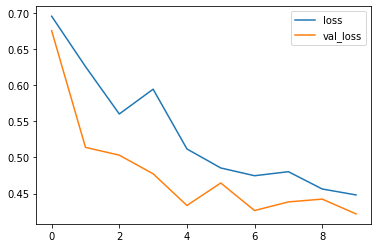

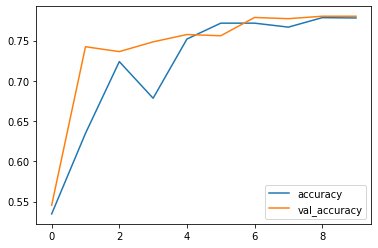

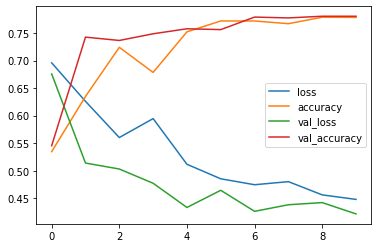

In [15]:
losses = pd.DataFrame(results.history)
losses.head()
losses[['loss','val_loss']].plot() 
losses[['accuracy','val_accuracy']].plot() 
losses.plot()


In [16]:
model.evaluate(test_set)

110/110 [==============================] - 23s 212ms/step - loss: 0.4217 - accuracy: 0.7803


[0.4217263460159302, 0.7803030014038086]

In [17]:
print("training_accuracy", results.history['accuracy'][-1])
print("validation_accuracy", results.history['val_accuracy'][-1])

training_accuracy 0.7781569957733154
validation_accuracy 0.7803030014038086


In [18]:
pred_probabilities = model.predict_generator(test_set)
pred_probabilities

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[2.98649073e-04],
       [5.82736492e-01],
       [6.12734258e-01],
       [6.08588815e-01],
       [5.32840192e-01],
       [5.70303321e-01],
       [6.86751962e-01],
       [6.37986243e-01],
       [6.00365281e-01],
       [4.66129184e-03],
       [9.88492370e-03],
       [5.28190196e-01],
       [4.59480286e-03],
       [1.89703703e-03],
       [4.09691334e-02],
       [2.03052163e-03],
       [6.48037314e-01],
       [2.99758077e-01],
       [6.95387304e-01],
       [1.31219625e-04],
       [1.85046256e-01],
       [1.68019712e-01],
       [5.70090473e-01],
       [6.38339639e-01],
       [2.14436650e-03],
       [8.62091780e-04],
       [5.66487014e-01],
       [5.75325429e-01],
       [3.92768383e-02],
       [5.81446648e-01],
       [2.15510428e-02],
       [6.63646698e-01],
       [5.77933908e-01],
       [6.21249318e-01],
       [6.71988130e-01],
       [5.75302243e-01],
       [4.53490317e-02],
       [3.83576751e-02],
       [6.09512210e-01],
       [5.83311200e-01],


In [19]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
predictions = pred_probabilities > 0.5
predictions

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,predictions))


              precision    recall  f1-score   support

           0       0.53      0.39      0.45       360
           1       0.45      0.58      0.51       300

    accuracy                           0.48       660
   macro avg       0.49      0.49      0.48       660
weighted avg       0.49      0.48      0.48       660

